<a href="https://colab.research.google.com/github/kvraagul/TimeSeriesAnalysis/blob/main/TSA1_WhiteNoise_%26_Stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [109]:
df = pd.read_csv('/content/Nifty 50 June 2020 - June 2021.csv',parse_dates=['Date'],index_col='Date')

In [110]:
del df['High'],df['Volume'],df['Low'],df['Adj Close'],df['Open']

Text(0.5, 1.0, 'Close')

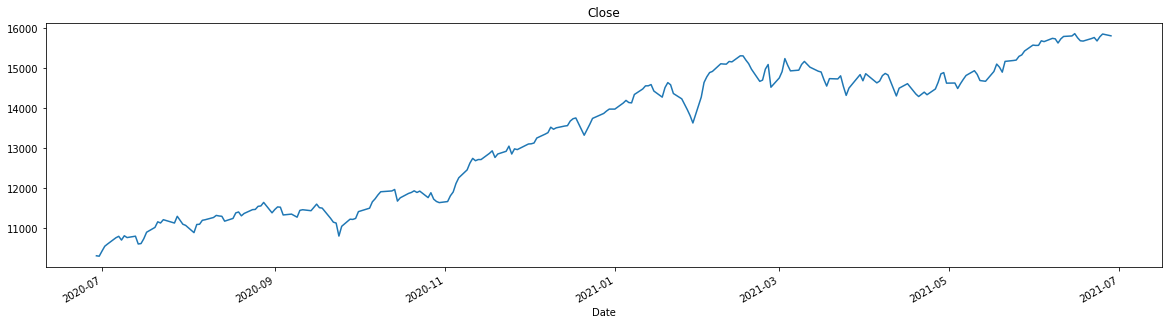

In [137]:
df.Close.plot()
plt.rcParams['figure.figsize']=(20,5)
plt.title('Close')

# White Noise

In [112]:
wn = np.random.normal(loc=df.Close.mean(), scale=df.Close.std(),size=len(df))

In [113]:
df['WhiteNoise'] = wn

In [114]:
df.head()

,Close,WhiteNoise
Date,,
2020-06-29,10312.400391,14650.077559
2020-06-30,10302.099609,14730.761864
2020-07-01,10430.049805,12545.860662
2020-07-02,10551.700195,11903.400577
2020-07-03,10607.349609,14854.184199


In [115]:
df=df.fillna(method='ffill')

In [116]:
df.describe()

,Close,WhiteNoise
count,251.000000,251.000000
mean,13324.193212,13497.950325
std,1700.947270,1863.607678
min,10302.099609,8188.293183
25%,11518.949707,12170.171968
50%,13740.700195,13587.441220
75%,14829.000000,14715.357895
max,15869.250000,19678.798878


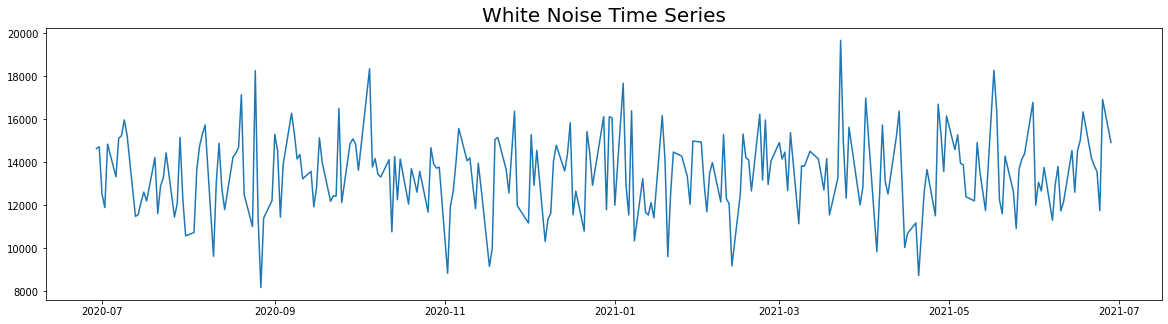

In [117]:
plt.plot(df['WhiteNoise'])
plt.title('White Noise Time Series',size=20)
plt.rcParams['figure.figsize']=(20,5)

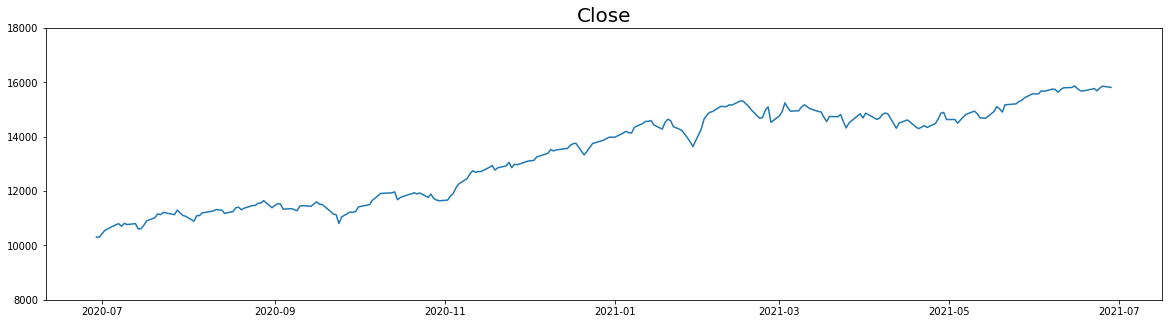

In [118]:
plt.plot(df['Close'])
plt.title('Close',size=20)
plt.ylim(8000,18000)
plt.rcParams['figure.figsize']=(20,5)

In [119]:
del df['WhiteNoise']

# Stationarity

**Augumented Dickey-Fuller Test**

In [120]:
import statsmodels.tsa.stattools as sts 

In [121]:
sts.adfuller(df.Close,autolag='AIC')

(-0.88796276139137,
 0.7919106027258074,
 3,
 247,
 {'1%': -3.457105309726321,
  '10%': -2.5730443824681606,
  '5%': -2.873313676101283},
 2995.4571412902365)

The p value is higher then 0.5 

It is not Stationarity 

# Converting Non-Stationarity data to Stationaarity Data

## Method 1 - Differencing

Y(t) = Y(t) - Y(t-1)

In [122]:
df['Close_Diff'] = df['Close'] - df['Close'].shift(1)

Text(0.5, 1.0, 'Differencing')

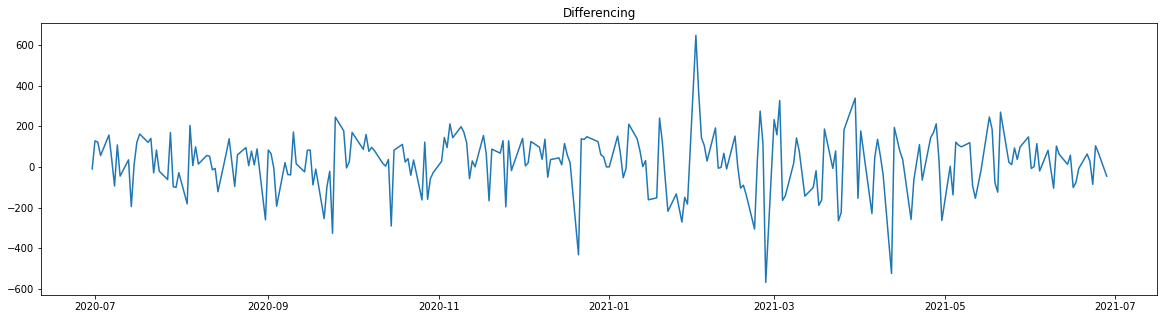

In [123]:
plt.plot(df['Close_Diff'])
plt.title('Differencing')

## Method 2 - Seasonal Differencing

In [124]:
df['Close_SeasonalDiff'] = df['Close'] - df['Close'].shift(7)

Text(0.5, 1.0, 'Seasonal Differencing')

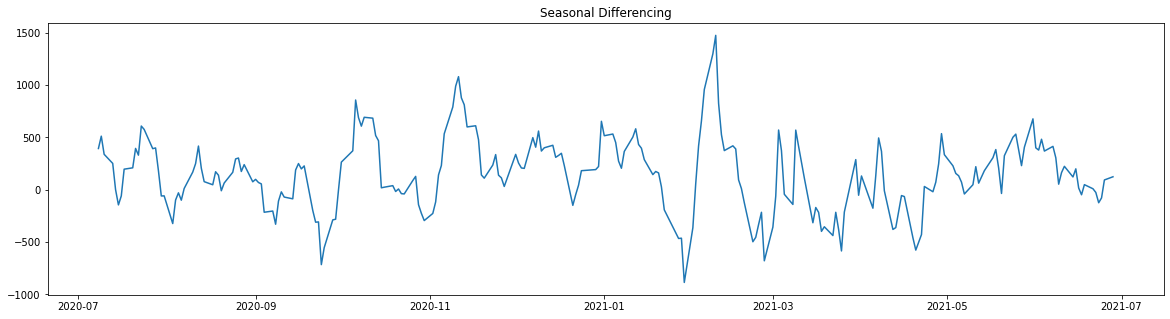

In [125]:
plt.plot(df['Close_SeasonalDiff'])
plt.title('Seasonal Differencing')

## Method 3 -Transformation

Taking log value, sqrt value, cbrt value

In [126]:
df['log'] = np.log(df['Close'])
df['Sqrt'] = np.sqrt(df['Close'])
df['Cbrt'] = np.cbrt(df['Close'])

Text(0.5, 1.0, 'log Transformation')

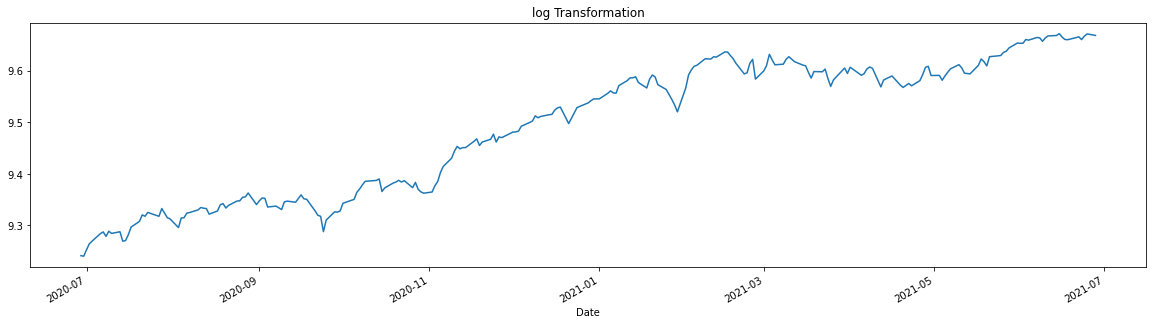

In [127]:
df.log.plot()
plt.title('log Transformation')

Text(0.5, 1.0, 'Sqrt Transformation')

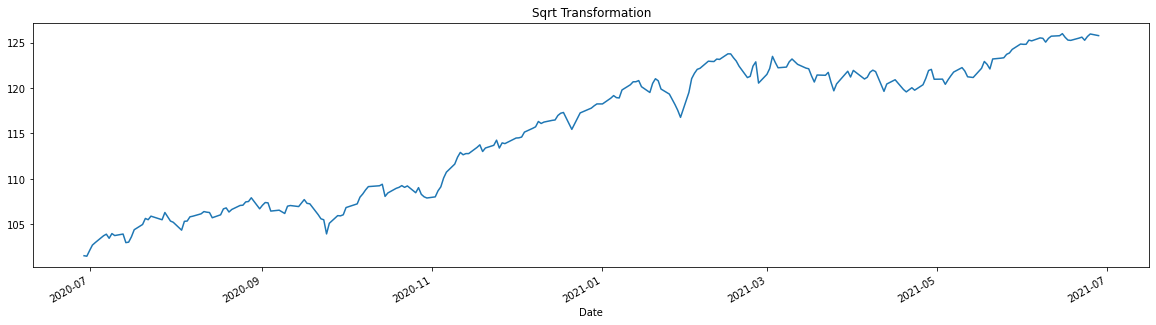

In [128]:
df.Sqrt.plot()
plt.title('Sqrt Transformation')

Text(0.5, 1.0, 'Cbrt Transformation')

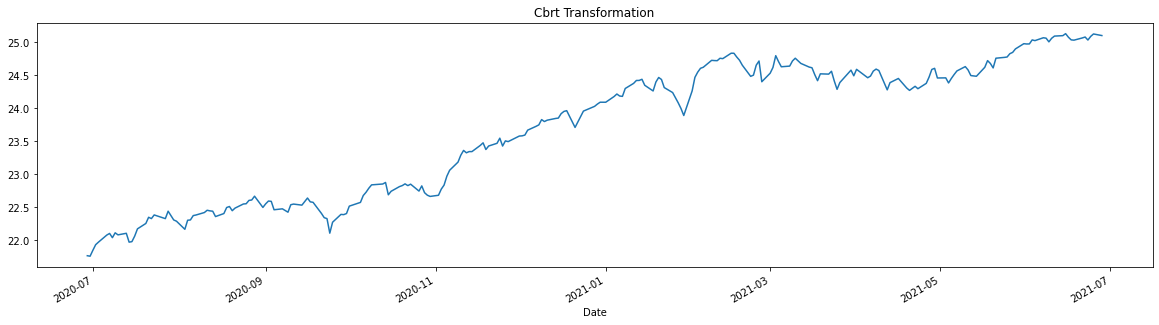

In [129]:
df.Cbrt.plot()
plt.title('Cbrt Transformation')

## Method 4 - Differencing on Transformation

Text(0.5, 1.0, 'Differencing on log')

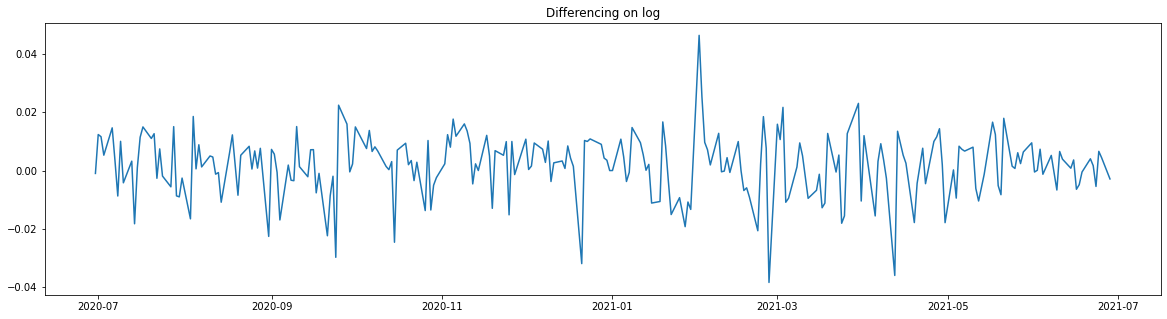

In [130]:
df['lod_diff'] = df['log'] - df['log'].shift(1)
plt.plot(df['lod_diff'])
plt.title('Differencing on log')

Text(0.5, 1.0, 'Differencing on Sqrt')

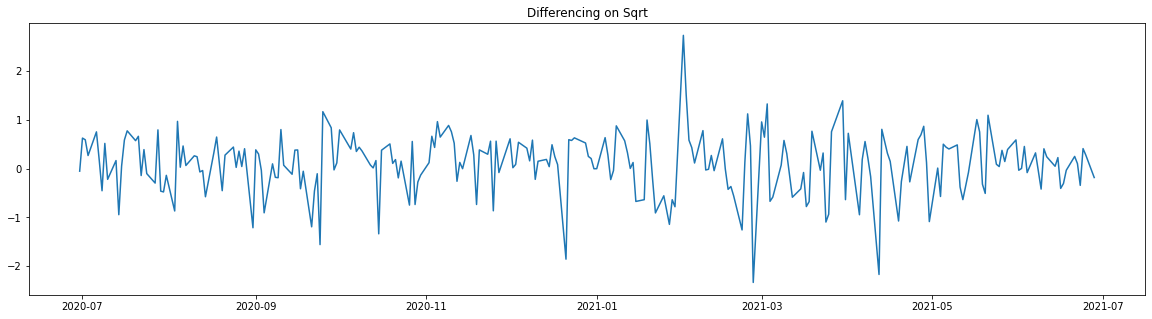

In [131]:
df['Sqrt_Diff'] = df['Sqrt'] - df['Sqrt'].shift(1)
plt.plot(df['Sqrt_Diff'])
plt.title('Differencing on Sqrt')

Text(0.5, 1.0, 'Differencing on Cbrt')

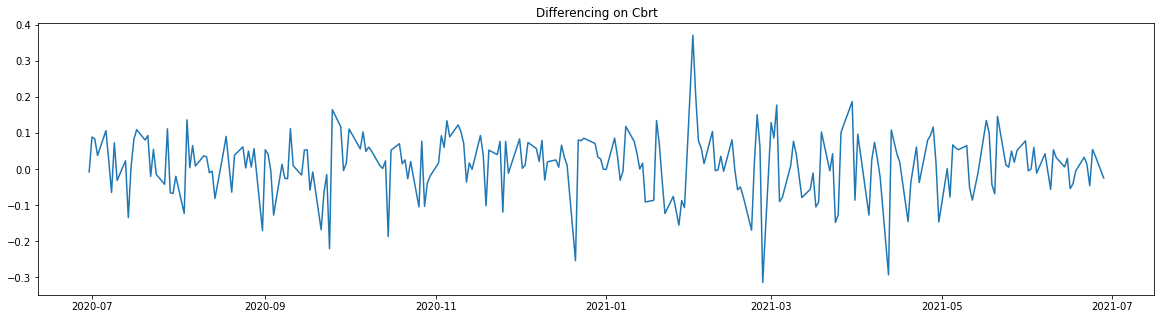

In [132]:
df['Cbrt_Diff'] = df['Cbrt'] - df['Cbrt'].shift(1)
plt.plot(df['Cbrt_Diff'])
plt.title('Differencing on Cbrt')

## Method 5 - Rolling Statistics

Text(0.5, 1.0, 'MA-20')

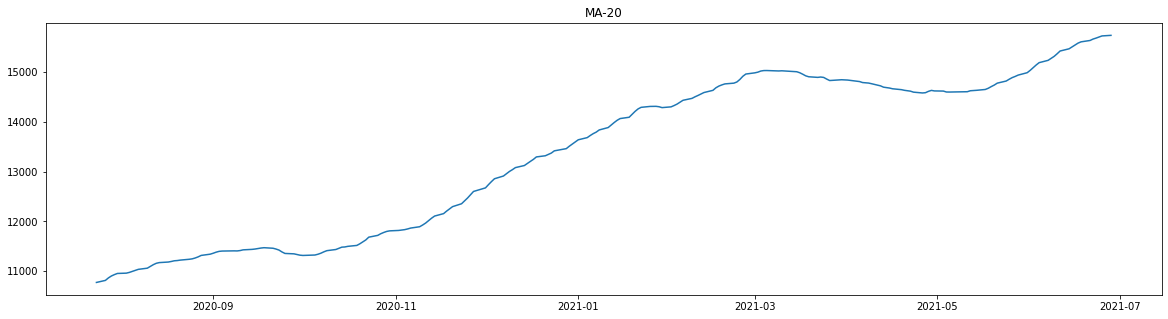

In [133]:
df['MA20'] = df['Close'].rolling(window=20).mean()
plt.plot(df['MA20'])
plt.title('MA-20')

<function matplotlib.pyplot.title>

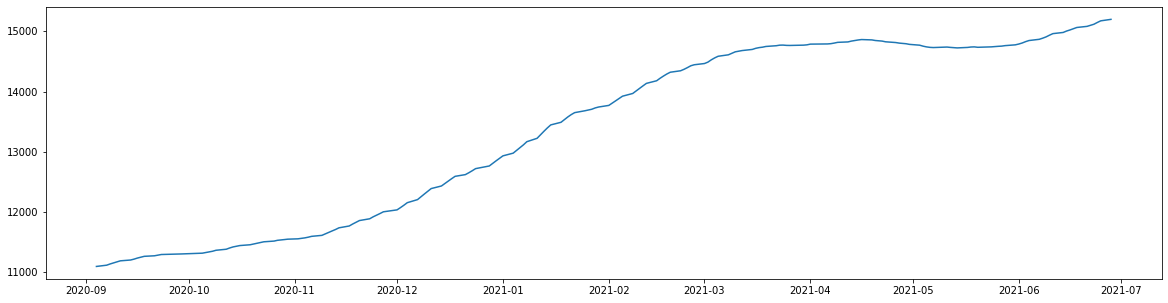

In [134]:
df['MA50'] = df['Close'].rolling(window=50).mean()
plt.plot(df['MA50'])
plt.title

In [135]:
df.head()

,Close,Close_Diff,Close_SeasonalDiff,log,Sqrt,Cbrt,lod_diff,Sqrt_Diff,Cbrt_Diff,MA20,MA50
Date,,,,,,,,,,,
2020-06-29,10312.400391,NaN,NaN,9.241102,101.549990,21.766399,NaN,NaN,NaN,NaN,NaN
2020-06-30,10302.099609,-10.300782,NaN,9.240103,101.499259,21.759149,-0.000999,-0.050730,-0.007250,NaN,NaN
2020-07-01,10430.049805,127.950196,NaN,9.252446,102.127615,21.848861,0.012343,0.628356,0.089711,NaN,NaN
2020-07-02,10551.700195,121.650390,NaN,9.264042,102.721469,21.933477,0.011596,0.593854,0.084616,NaN,NaN
2020-07-03,10607.349609,55.649414,NaN,9.269302,102.991988,21.971968,0.005260,0.270519,0.038491,NaN,NaN


In [136]:
df.tail()

,Close,Close_Diff,Close_SeasonalDiff,log,Sqrt,Cbrt,lod_diff,Sqrt_Diff,Cbrt_Diff,MA20,MA50
Date,,,,,,,,,,,
2021-06-22,15772.750000,26.250000,-26.599609,9.666039,125.589609,25.078553,0.001666,0.104551,0.013920,15658.812402,15099.413945
2021-06-23,15686.950195,-85.799805,-124.899414,9.660584,125.247556,25.032997,-0.005455,-0.342054,-0.045556,15678.087402,15116.455957
2021-06-24,15790.450195,103.500000,-78.799805,9.667161,125.660058,25.087930,0.006576,0.412502,0.054934,15700.717432,15146.048965
2021-06-25,15860.349609,69.899414,92.799804,9.671578,125.937880,25.124895,0.004417,0.277822,0.036964,15721.952392,15173.159961
2021-06-28,15814.700195,-45.649414,123.299804,9.668695,125.756512,25.100767,-0.002882,-0.181368,-0.024128,15733.547412,15197.824961
